# Applying Trained Traffic Sign Detectors

---

This notebook is part of https://github.com/risc-mi/atsd.

This notebook demonstrates how pre-trained traffic sign detectors, as presented in our accompanying paper, can be applied to traffic sign images from [ATSD-Signs](https://contentportal.asfinag.at/traffic-sign-catalogue) or other data sets.

## Package Imports

In [18]:
from yolov4.tf import YOLOv4
from pathlib import Path
from matplotlib import pyplot as plt
from skimage.io import imread

## Path

Set `ROOT` to the path to the directory where ATSD-Scenes is located. This is the directory containing folders `"/train"` and `"/test"`.

In [11]:
ROOT = Path(r"path-to-atsd-scenes")

## Load Model

In [6]:
model_version = "v1"

In [7]:
yolo = YOLOv4()

yolo.config.parse_names("weights/detection/classes.names")
yolo.config.parse_cfg("weights/detection/detector_yolov4_tiny.cfg")

yolo.make_model()
yolo.load_weights(f"weights/detection/{model_version}.weights", weights_type="yolo")

## Load images

Load some image from the test set of ATSD-Scenes and display it:

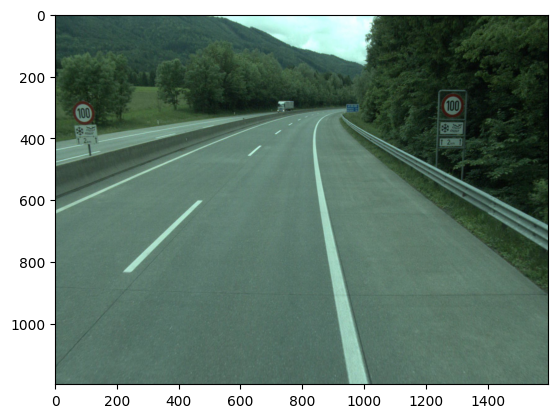

In [36]:
img = imread(ROOT / 'test/imgs/99.jpg')
plt.imshow(img);

## Inference detection model

In [34]:
detection_bboxes = yolo.predict(img, 0.15)

## Display result

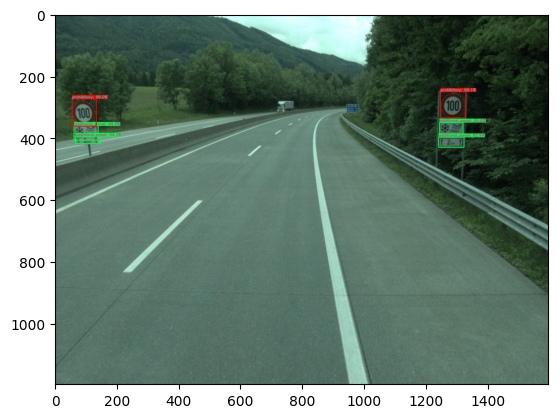

In [35]:
plt.imshow(yolo.draw_bboxes(img, detection_bboxes));